<a href="https://colab.research.google.com/github/FanchonSora/TMC-Lab/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Part 1: Golden Section Search
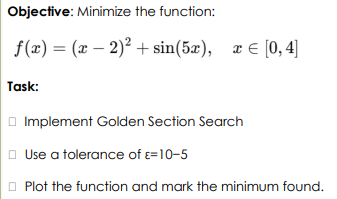

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x - 2)**2 + np.sin(5 * x)

In [22]:
# Golden Section Search
def gs_search(a, b, tol):
    t = (np.sqrt(5) - 1) / 2  # (τ)
    x1 = a * (1 - t) + b * t
    x2 = a * t + b * (1 - t)
    while abs(b - a) > tol:
        if f(x1) > f(x2):
            a = x1
            x1 = x2
            x2 = a * t + b * (1 - t)
        else:
            b = x2
            x2 = x1
            x1 = a * (1 - t) + b * t
    min = (a + b) / 2
    return min

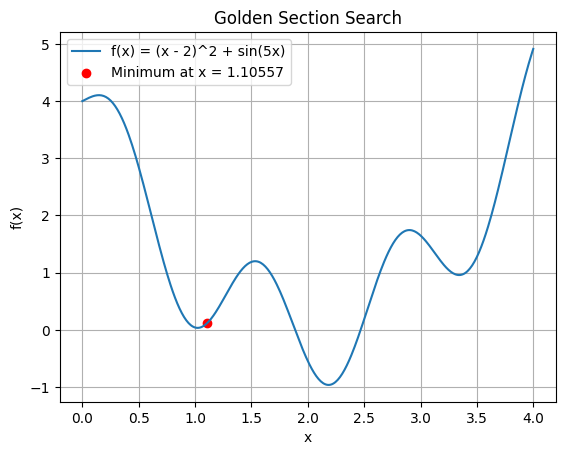

Minimum value at 1.10557


In [20]:
a, b = 0, 4
tolerance = 1e-5
min = gs_search(a, b, tol=tolerance)
x_vals = np.linspace(a, b, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x) = (x - 2)^2 + sin(5x)")
plt.scatter(min, f(min), color='red', label=f'Minimum at x = {min:.5f}')
plt.title('Golden Section Search')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(f"Minimum value at {min:.5f}")

##Part 2: Gradient Descent in 1D
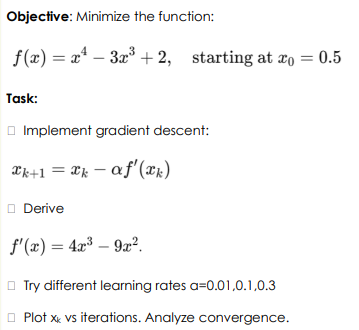

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**4 - 3*x**3 + 2

In [24]:
def df(x):
    return 4*x**3 - 9*x**2

In [32]:
def g_d(l_r, x0, iteration):
    x_values = [x0]
    x = x0
    for i in range(iteration):
        x = x - l_r * df(x)
        if abs(x) > 1e5:  # Limit
            print(f"Overflow iteration {i} with x = {x}")
            break
        x_values.append(x)
    return x_values

Overflow iteration 19 with x = -289453420202.37744


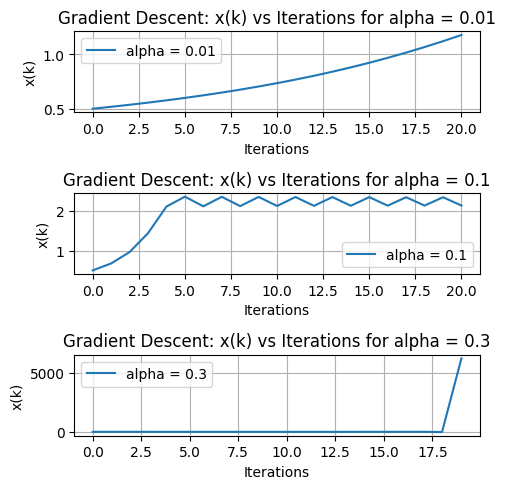

In [50]:
x0 = 0.5
iteration = 20
l_r = [0.01, 0.1, 0.3]
fig, axes = plt.subplots(3, 1, figsize=(5, 5))
for i, a in enumerate(l_r):
    x_values = g_d(a, x0, iteration)
    axes[i].plot(range(len(x_values)), x_values, label=f'alpha = {a}')
    axes[i].set_title(f'Gradient Descent: x(k) vs Iterations for alpha = {a}')
    axes[i].set_xlabel('Iterations')
    axes[i].set_ylabel('x(k)')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

Overflow iteration 19 with x = -289453420202.37744


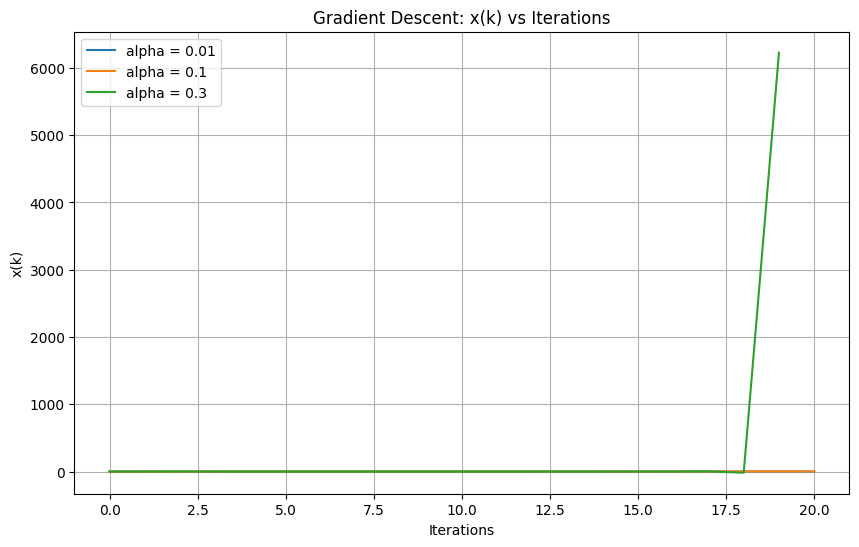

In [46]:
x0 = 0.5
iteration = 20
l_r = [0.01, 0.1, 0.3]
plt.figure(figsize=(10, 6))
for a in l_r:
    x_values = g_d(a, x0, iteration)
    plt.plot(range(len(x_values)), x_values, label=f'alpha = {a}')
plt.title('Gradient Descent: x(k) vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('x(k)')
plt.legend()
plt.grid(True)
plt.show()

##Part 3: Newton’s Method
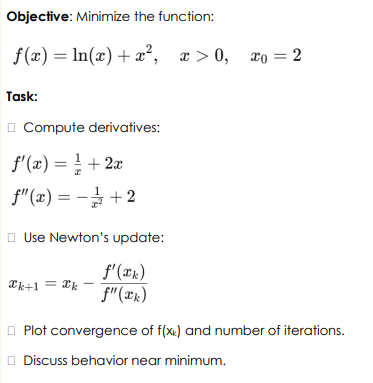

In [51]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.log(x) + x**2

In [52]:
def df(x):
    return 1/x + 2*x

In [54]:
def d2_f(x):
    return -1/x**2 + 2

In [78]:
def newtons_method(x0, iteration, tolerance):
    x_vals = [x0]
    f_vals = [f(x0)]
    for _ in range(iteration):
        x_new = x_vals[-1] - df(x_vals[-1]) / d2_f(x_vals[-1])
        x_vals.append(x_new)
        f_vals.append(f(x_new))
        if abs(x_vals[-1] - x_vals[-2]) < tolerance:
            break
    return x_vals, f_vals

In [80]:
x0 = 2
iter = 20
tol = 1e-6
x_vals, f_vals = newtons_method(x0, iter, tol)

<ipython-input-51-b0ab082b1e18>:4: RuntimeWarning: invalid value encountered in log
  return np.log(x) + x**2


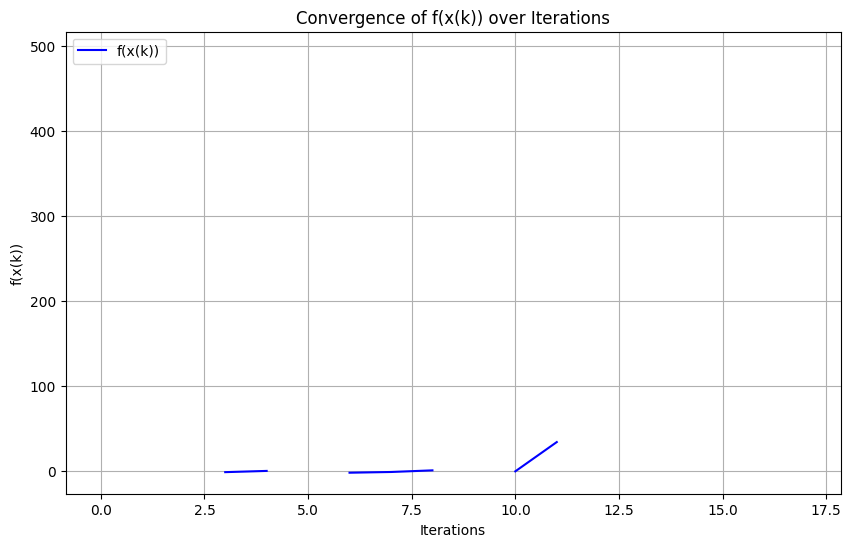

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(f_vals)), f_vals, label="f(x(k))", color='b')
plt.title("Convergence of f(x(k)) over Iterations")
plt.xlabel("Iterations")
plt.ylabel("f(x(k))")
plt.grid(True)
plt.legend()
plt.show()

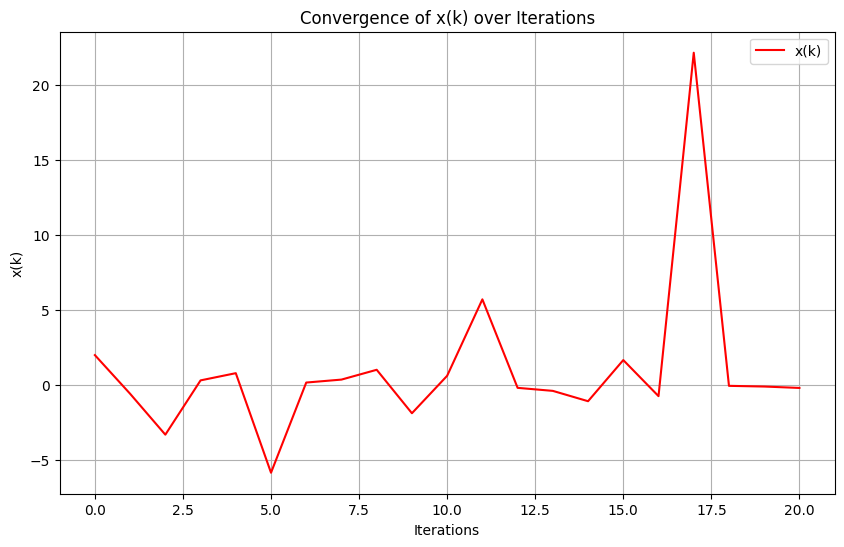

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(x_vals)), x_vals, label="x(k)", color='r')
plt.title("Convergence of x(k) over Iterations")
plt.xlabel("Iterations")
plt.ylabel("x(k)")
plt.grid(True)
plt.legend()
plt.show()

In [83]:
print("Final value of x:", x_vals[-1])
print("f(x) at the final x:", f_vals[-1])

Final value of x: -0.18482065445840257
f(x) at the final x: nan
